In [38]:
import os

In [40]:
import warnings

In [42]:
# Suppress joblib warnings
warnings.filterwarnings("ignore", category=UserWarning, module="joblib")

In [1]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
from sklearn.datasets import load_breast_cancer

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score

In [9]:
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
from sklearn.svm import SVC

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [24]:
import matplotlib.pyplot as plt

In [26]:
# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [28]:
# Check for missing values
if np.isnan(X).any():
    print("Missing values found. Imputing with mean values.")
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)


In [30]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [34]:
# Initialize classifiers
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "SVM": SVC(random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5)
}


In [44]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

In [48]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [52]:
 # Store results
results[name] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}


In [54]:
# Create a DataFrame for comparison
results_df = pd.DataFrame(results).T

In [56]:
# Print the performance metrics
print("Performance Comparison:")
print(results_df)

Performance Comparison:
      Accuracy  F1 Score  Precision    Recall
k-NN  0.947368  0.957746   0.957746  0.957746


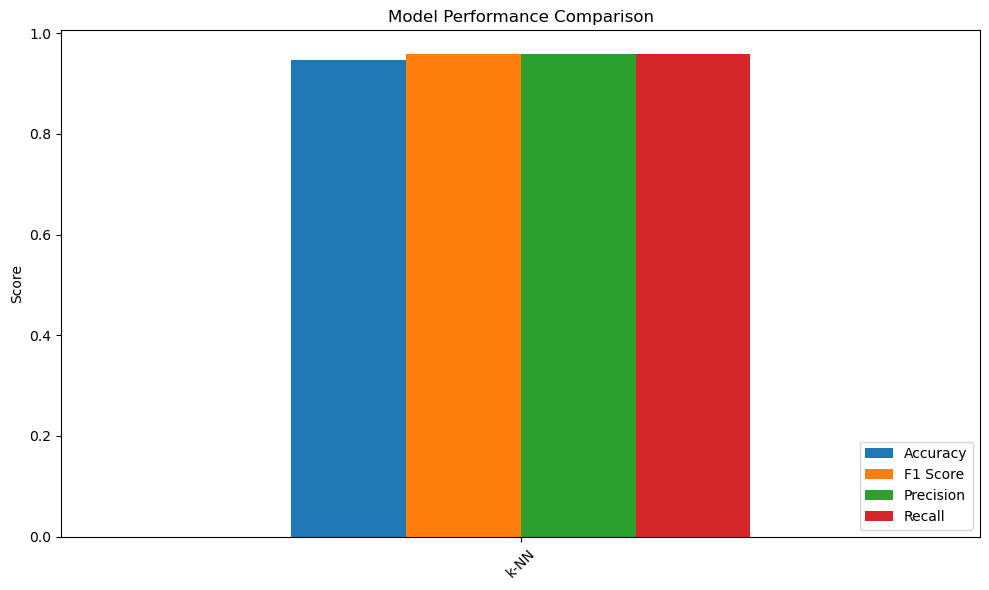

In [58]:
# Visualize the results
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [60]:
# Identify the best and worst-performing models
best_model = results_df["F1 Score"].idxmax()
worst_model = results_df["F1 Score"].idxmin()

In [62]:
print(f"Best Performing Model: {best_model}")
print(f"Worst Performing Model: {worst_model}")

Best Performing Model: k-NN
Worst Performing Model: k-NN
